# Research on apartment listings

We have at our disposal the data of the Yandex Real Estate service — an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the market value of real estate. The main task is to set the parameters. This will allow us to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

**According to the data documentation:**

- `airports_nearest` — distance to the nearest airport in meters (m)
- `balcony` — number of balconies
- `ceiling_height` — ceiling height (m)
- `cityCenters_nearest` — distance to the city center (m)
- `days_exposition` — how many days the ad was placed (from publication to removal)
- `first_day_exposition` — date of publication
- `floor` — floor
- `floors_total` — total floors in the house
- `is_apartment` — apartments (boolean type)
- `kitchen_area` — kitchen area in square meters (m²)
- `last_price` — price at the time of withdrawal from publication
- `living_area` — living area in square meters (m²)
- `locality_name` — name of the locality
- `open_plan` — free layout (boolean type)
- `parks_around3000` — the number of parks within a 3 km radius
- `parks_nearest` — distance to the nearest park (m)
- `ponds_around3000` — number of reservoirs within a radius of 3 km
- `ponds_nearest` — distance to the nearest reservoir (m)
- `rooms` — number of rooms
- `studio` — studio apartment (boolean type)
 -`total_area` — the area of the apartment in square meters (m²)
- `total_images` — the number of photos of the apartment in the ad

## Step 1. Examining data from a file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Missing number in features
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


The dataframe contains `23699 strings` each of which is described by `22 features`:

- 17 quantitative;
- 4 categorical;
- 1 temporary.

Some characteristics have missing values need to be processed.

## Step 2. Data Preprocessing

Define the missing and duplicate values in each data column

In [6]:
data.duplicated().sum() 

0

In [7]:
# percentage of missing values calculation in the dataframe
round((data.isna().sum() / len(data)) * 100, 2)  

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

**Missing values**

- ceiling_height: 

     - missing values is 38.8 %;
     - some values were entered manually with an error (27 m instead of 2.7 m, etc.).
    
Missing values are handled:
     - Changed to the median.
    
Perhaps some do not consider this a mandatory item and therefore have not taken any action to find out the ceilings height.

-----------------------------------------------------------------------------------------------------------------------------  
- floors_total: 

   - missing values is 0.36 %;
   
This feature will be used in the analysis and it is not possible to replace the missing values accurately enough.
    
----------------------------------------------------------------------------------------------------------------------------- 
- living_area 

    - missing values is 0 %.

----------------------------------------------------------------------------------------------------------------------------- 
- balcony: 

    - missing values is 48.6 %. 
    
It is assumed that the absence of the number of balconies indicates that the number of balconies is zero.

-----------------------------------------------------------------------------------------------------------------------------   
- locality_name:

looks strange when the locality is not indicated. Perhaps many people think that it is enough to indicate the category in the "St. Petersburg" section of the site.

----------------------------------------------------------------------------------------------------------------------------- 
- locality_name: 

    - missing values is 0.21 %. 
    
All objects with missing values are NOT removed because the feature will be used in further analysis. It is necessary to enter a condition on the mandatory filling of this feature in the ad.

----------------------------------------------------------------------------------------------------------------------------- 
- cityCenters_nearest: 

    - missing values is 23.3 %.
    
The complexity of filling in such missing values is high. Leave the missing values unchanged.

----------------------------------------------------------------------------------------------------------------------------- 
- is_apartment, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest: 

Missing values in these features are left unchanged as they will not be used in the current study.

-----------------------------------------------------------------------------------------------------------------------------
- kitchen_area:

    - missing values is 10 %. 
    
For the following reason:

   - studio apartment;
   - human error;
   - forgot to fill.
    
-----------------------------------------------------------------------------------------------------------------------------


- days_exposition: 

    - missing values is 13.4 %.
    
Information may be missing for example due to the fact that it is not known when the sale announcement was closed i.e. in fact, the transaction was completed but was not closed on the online resource. 
For the same reason we can get results in the form of an apartment sale period of several years. 
However it is not worth putting down information about the timing of the sale at random. Here "mean" and "median" will not suitable. 
It would be possible to see how apartments with the same parameters were sold. Therefore we leave this column alone but change the data type in it.

In [8]:
# in column 'ceiling_height' abnormal values are found. Ceiling heights cannot be double digits (10 - 100 meters), 
# and less than 2.5 m (in the data there are values of 1.75 m and even 1 m).
# Fill in the missings with the median value.
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 9, data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] >= 2.5, data['ceiling_height'].median())
#data['ceiling_height'].describe()

# Assumed NaN's in columsn 'is_apartment' means that the user has not specified a room type.
# Fill in the missing values with "False"
data['is_apartment'] = data['is_apartment'].fillna(False)

# The number of balconies is not specified. In the 'balcony' column of NAN's we replace it with "0".
data['balcony'] = data['balcony'].fillna(0)

# Fill 'floors_total' by meadian
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

# I divide the column with prices by 1,000,000 (million) for convenience
data['last_price'] = data['last_price'] / 1000000

In [9]:
# change the data type of the 'is_apartment' column to boolean
data['is_apartment'] = data['is_apartment'].astype(bool)

# Change data type to datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d')

# change the data type float to int to save RAM
data['floors_total'] = data['floors_total'].astype(int)

# change data type float to int to save RAM
data['balcony'] = data['balcony'].astype(int)

#change data type float to int to save RAM
data['days_exposition'] = data['days_exposition'].astype('float32')
    
# I delete the objects where the names of locality are missing. 
# Without this data it is difficult to predict / analyze.
data['locality_name_drop'] = data['locality_name'].isna()
data = data.query('locality_name_drop == False')
data = data.reset_index(drop=True)

# change data type float to int to save RAM
data[['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']]\
  = data[['airports_nearest','cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest']]\
  .astype('float32')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

## Step 3. Calculate and add to the table

**Price per square meter**

In [11]:
data['sqrm_price'] = round(((data['last_price'] / data['total_area']) * 1000000), 1)

**Day of the week, month and year of publication of the announcement**

In [12]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

**Floor:**
- the first;
- last;
- another.

In [13]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data['floor_category'] = data['floor_category'].fillna('другой')

#data['floor_category'].value_counts()

**The ratio of living and total area, as well as the ratio of kitchen area to total**

In [14]:
data['liv_total_relation'] = data['living_area'] / data['total_area']
data['kitch_total_relation'] = data['kitchen_area'] / data['total_area']

## Step 4. EDA

**Plot histograms for area, price, number of rooms, ceiling heights.**

In [15]:
data_analysis = pd.Series(['total_area','last_price','rooms', 'ceiling_height'])


def det_whiskers(column):
    descr = data[column].describe()
    
    # interquartile range
    iqr = descr[6] - descr[4]
    
    left_whisker = round(descr[4] - 1.5 * iqr, 2)
    right_whisker = round(descr[6] + 1.5 * iqr, 2)

    if left_whisker < descr[3]: left_whisker = descr[3] 
    if right_whisker > descr[7]: right_whisker = descr[7]
        
    return [left_whisker,right_whisker]



# define a function calculates the proportion of anomalous values
def print_anomalies_ratio(column):
    print(f'Аномальные значения составляют \
{round(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data[column])*100), 2}\
% от всей выборки.')


**Square**

In [16]:
det_whiskers('total_area')

[12.0, 114.25]

In [17]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Text(0, 0.5, 'Частота')

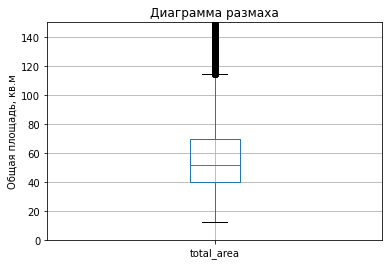

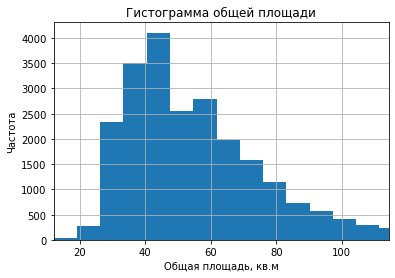

In [18]:
# Plot whisker limiting the area to 160 sq.m
data.boxplot(column='total_area')
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв.м')
plt.ylim(0, 150)

# Plot HIST limiting the area to 160 sq.m
# data.hist('total_area',bins=100,range=(0,160))
data.hist('total_area',bins=125)
plt.xlim(det_whiskers('total_area')[0], det_whiskers('total_area')[1])
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')

In [19]:
print_anomalies_ratio('total_area')

Аномальные значения составляют (5, 2)% от всей выборки.


In [20]:
# I add a column with a feature that describes an abnormally large area of real estate.
data['too_large_area'] = data['total_area'] > det_whiskers('total_area')[1]

**Price**

In [21]:
det_whiskers('last_price')

[0.01219, 11.9]

In [22]:
data['last_price'].describe()

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

Text(0, 0.5, 'Частота')

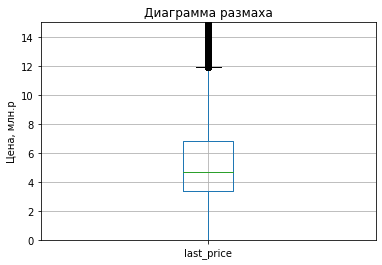

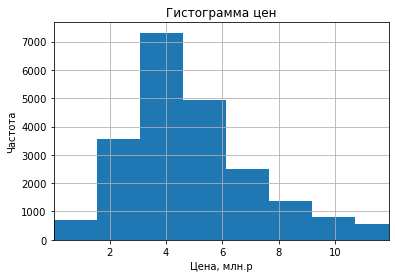

In [23]:
# Plot whisker
data.boxplot(column='last_price')
plt.title('Диаграмма размаха')
plt.ylabel('Цена, млн.р')
plt.ylim(0, 15)

# Plot hist
# data.hist('last_price',bins=100,range=(0,20))
data.hist('last_price',bins=500)
plt.xlim(det_whiskers('last_price')[0], det_whiskers('last_price')[1])
plt.title('Гистограмма цен')
plt.xlabel('Цена, млн.р')
plt.ylabel('Частота')

In [24]:
print_anomalies_ratio('last_price')

Аномальные значения составляют (9, 2)% от всей выборки.


In [25]:
# I add a column with a feature that describes an abnormally large area of real estate.
data['too_large_price'] = data['last_price'] > det_whiskers('last_price')[1]


**Room number**

In [26]:
det_whiskers('rooms')

[0.0, 6.0]

In [27]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Частота')

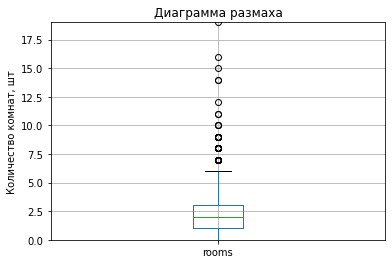

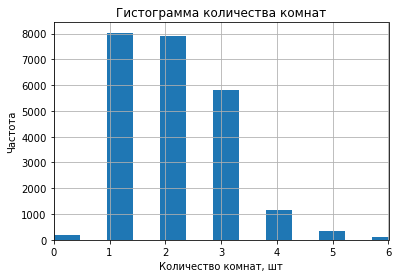

In [28]:
# Whisker plot
data.boxplot(column='rooms')
plt.title('Диаграмма размаха')
plt.ylabel('Количество комнат, шт')
plt.ylim(0, 19)

# Plot histogram
# data.hist('rooms',bins=30,range=(0,19))
data.hist('rooms',bins=40)
plt.xlim(det_whiskers('rooms')[0], det_whiskers('rooms')[1])
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат, шт')
plt.ylabel('Частота')

In [29]:
print_anomalies_ratio('rooms')

Аномальные значения составляют (0, 2)% от всей выборки.


In [30]:
data['too_large_rooms'] = data['rooms'] > det_whiskers('rooms')[1]

**Ceiling height**

In [31]:
det_whiskers('ceiling_height')

[2.5, 2.85]

In [32]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.698592
std          0.230798
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Частота')

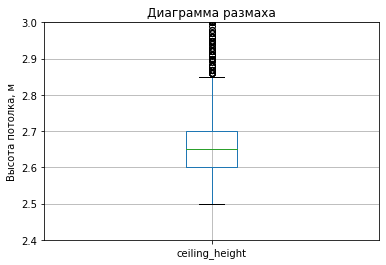

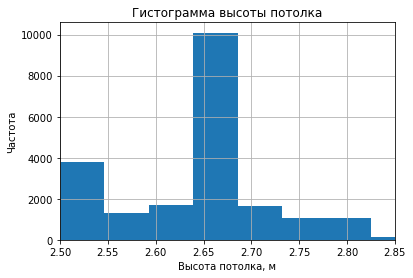

In [33]:
# Whisker plot
data.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха')
plt.ylabel('Высота потолка, м')
plt.ylim(2.4, 3)

# Plot histogram
# data.hist('ceiling_height',bins=30,range=(2.4,3))
data.hist('ceiling_height',bins=125)
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title('Гистограмма высоты потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Частота')

In [34]:
print_anomalies_ratio('ceiling_height')

Аномальные значения составляют (12, 2)% от всей выборки.


In [35]:
data['large_ceiling_height'] = data['ceiling_height'] > det_whiskers('ceiling_height')[1]

**To study the time of sale of the apartment.**
 
- Plot a histogram;
- Calculate the mean and median;
- Describe how long a sale usually takes?
- When can we assume sales were very fast and when unusually long?

In [36]:
det_whiskers('days_exposition')

[1.0, 510.0]

In [37]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753204
std        219.778961
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'Частота')

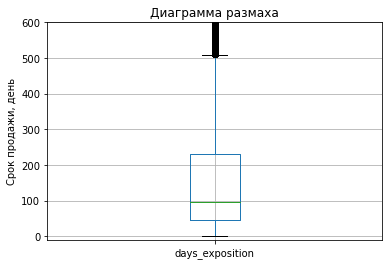

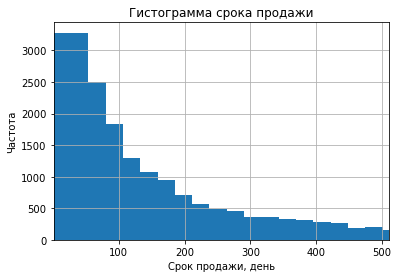

In [38]:
# Plot whisker
data.boxplot(column='days_exposition')
plt.title('Диаграмма размаха')
plt.ylabel('Срок продажи, день')
plt.ylim(-10, 600)

# Plot hist
#data.hist('days_exposition',bins=50,range=(0,1500))
data.hist('days_exposition',bins=60)
plt.xlim(det_whiskers('days_exposition')[0], det_whiskers('days_exposition')[1])
plt.title('Гистограмма срока продажи')
plt.xlabel('Срок продажи, день')
plt.ylabel('Частота')

In [39]:
data['too_slow'] = data['days_exposition'] > det_whiskers('days_exposition')[1]
data['too_fast'] = data['days_exposition'] < 30

- The sale takes 80-105 days. At the same time a quarter of all properties are sold within 45 days from the date of publication.
- If the object was sold within a month it is necessary to check this transaction for fraud.
- If the object was sold only after 430 days from the date of publication is an abnormally long sale.

**Remove rare and outliers**

- What features did you find?

In [40]:
good_data = data.query('(too_large_area == False)  and \
                        (too_large_price == False) and \
                        (too_large_rooms == False) and \
                        (large_ceiling_height == False) and\
                        (too_slow == False) and \
                        (too_fast == False)').reset_index(drop=True)
print(f' Репрезентативные данные составляют {round((len(good_data) / len(data)) * 100),2}% от общего числа')

 Репрезентативные данные составляют (64, 2)% от общего числа


Anomalous characteristics of apartments from the presented dataset:

- 7-room apartment or more
- over 120 sq. m
- with ceilings less than 2.25 m or more than 3 m
- at a price of more than 12 million rubles
- sold for 14 months or more

**What factors most affect the value of an apartment?**

Learn if the price depends on the area, number of rooms, distance from the center

- High correlation between the area of the apartment and its cost (correlation coefficient 0.674).
- The distance to the city center affects the cost of the apartment but inversely and not so much (correlation coefficient -0.4).
- The cost of an apartment also directly depends on the number of rooms - the more rooms the more expensive the apartment.
- Apartments on the first or last floor are usually sold at a lower price than apartments on other floors.
- The day of the week and month of publication of the announcement do not play a significant role in the price at which the property will be sold. 
- The study showed that on average, apartments were sold at higher prices in 2014

Text(7, 105, 'Корреляция: 0.676')

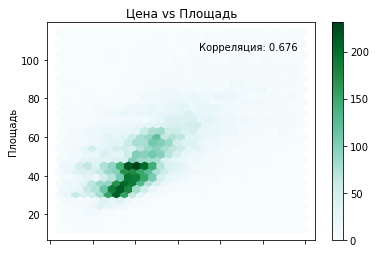

In [41]:
# Hexbin plot
good_data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=30)
plt.title('Цена vs Площадь')
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.text(7,105,'Корреляция: ' + str(round(good_data['last_price'].corr(good_data['total_area']),3)))

Text(7, 5, 'Корреляция: 0.403')

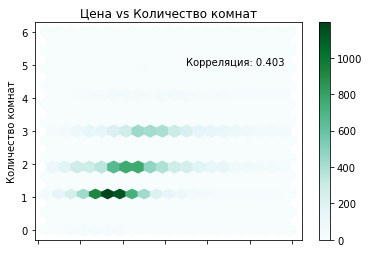

In [42]:
# Hexbin plot
good_data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20)
plt.title('Цена vs Количество комнат')
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.text(7,5,'Корреляция: ' + str(round(good_data['last_price'].corr(good_data['rooms']),3)))

Text(7, 60000, 'Корреляция: -0.305')

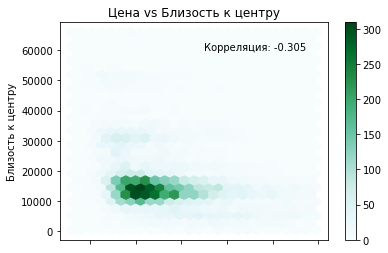

In [43]:
# Hexbin plot
good_data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=25)
plt.title('Цена vs Близость к центру')
plt.xlabel('Цена')
plt.ylabel('Близость к центру')
plt.text(7,60000,'Корреляция: ' + str(round(good_data['last_price'].corr(good_data['cityCenters_nearest']),3)))


**Study the dependence of the price on which floor the apartment is located on**
- first;
- last;
- another.

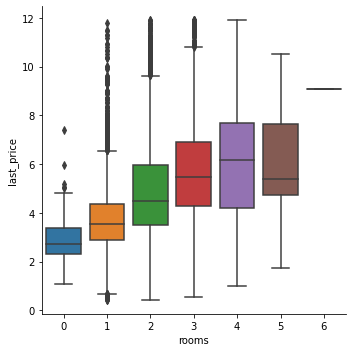

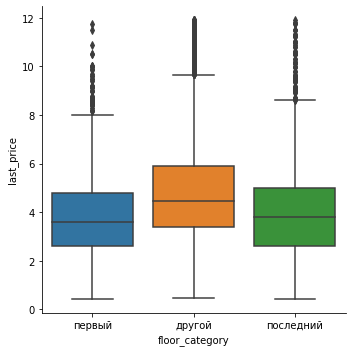

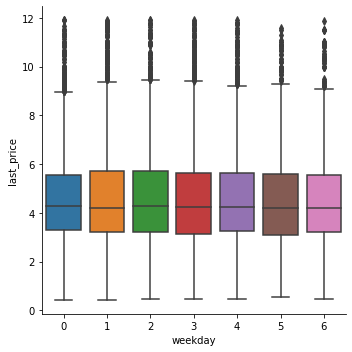

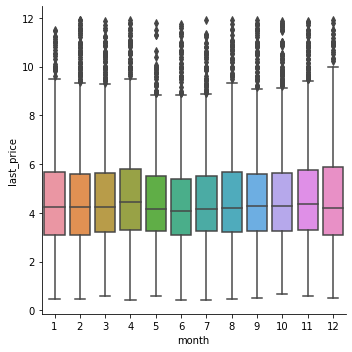

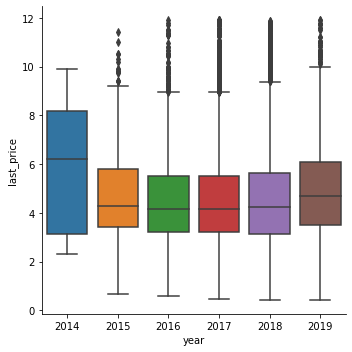

In [44]:
for i in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sb.catplot(x=i, y="last_price", kind="box", data=good_data)

1) Select the 10 locations with the most ads. 

2) Calculate the average price per square meter in these settlements.

3) Select among them the locations with the highest and lowest cost of housing. (This data can be found by name in the locality_name column.)

In [45]:
many_ads = good_data.pivot_table(index='locality_name', values='sqrm_price', aggfunc=['count','median'])
many_ads.columns = ['count', 'median_price']
many_ads = many_ads.sort_values(by='count', ascending=False)\
                   .reset_index()\
                   .truncate(before=0, after=9)
print(many_ads)

       locality_name  count  median_price
0    Санкт-Петербург   9178     101675.45
1     посёлок Мурино    374      85714.30
2     посёлок Шушары    348      76220.40
3         Всеволожск    315      65789.50
4  посёлок Парголово    260      91337.30
5            Колпино    237      74657.50
6             Пушкин    237      98051.90
7            Гатчина    224      66666.70
8    деревня Кудрово    216      92225.05
9             Выборг    173      56818.20


From the 10 locations with the largest number of ads the leaders in terms of average price per square meter are:
    
- St. Petersburg, Murino, Shushary, Vsevolozhsk.
- On average the cheapest square meters are in Vyborg and the village of Kudrovo

<AxesSubplot:xlabel='median_price', ylabel='locality_name'>

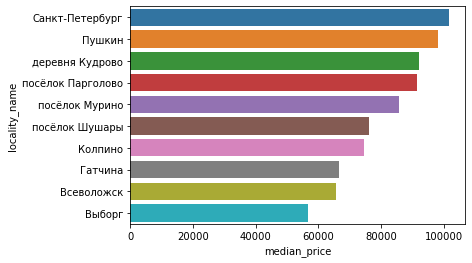

In [46]:
sb.barplot(y='locality_name', x='median_price', data=many_ads.sort_values(ascending=False,by='median_price'))

**Study the offers of apartments:**

- For each apartment there is information about the distance to the center;
- Select apartments in St. Petersburg (locality_name).

**The task is to find out which area is included in the center.**

- Create a column with the distance to the center in kilometers: round to whole numbers;
- calculate the average price for each kilometer;
- Build a graph: it should show how the price depends on the distance from the center;
- Define the border where the graph changes a lot - this will be the central zone.

In [47]:
# create a table with data about Peter
saintp = good_data.query('locality_name == "Санкт-Петербург"')\
                  .reset_index(drop=True)

In [48]:
# column with the distance to the center in kilometers
saintp['cityCenters_km'] = round(saintp['cityCenters_nearest'] / 1000,0)


In [49]:
# column last_price - data in million rubles
saintp_radius = saintp.pivot_table(index='cityCenters_km', values=['last_price','sqrm_price'], aggfunc='mean')
saintp_radius = saintp_radius.reset_index()

We will consider the center of St. Petersburg to be a circle with a radius of 8 km

Text(6, 25, 'Корреляция: 0.403')

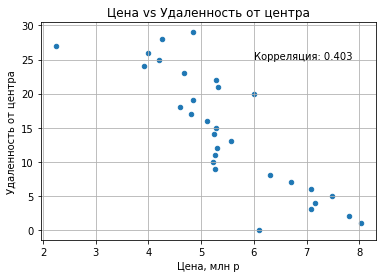

In [50]:
# Hexbin plot
saintp_radius.plot(x='last_price', y='cityCenters_km', kind='scatter', grid=True)
plt.title('Цена vs Удаленность от центра')
plt.xlabel('Цена, млн р')
plt.ylabel('Удаленность от центра')
plt.text(6,25,'Корреляция: ' + str(round(good_data['last_price'].corr(good_data['rooms']),3)))

**Select a segment of apartments in the center.**

Analyze this territory and study the following parameters:

- square;
- price;
- number of rooms;
- ceiling height.

The average apartment in the center of St. Petersburg is:
a `2-room apartment` with an area of ~ `60 sq. m` with `ceilings 2.75 m`, at a `price of ~ 7 million rubles`

In [51]:
saintp_center = saintp.loc[(saintp['cityCenters_km'] <= 8)]
saintp_center = saintp_center.reset_index(drop=True)

**Square**

count    1212.000000
mean       60.367863
std        20.091215
min        12.000000
25%        44.000000
50%        58.545000
75%        73.000000
max       114.200000
Name: total_area, dtype: float64


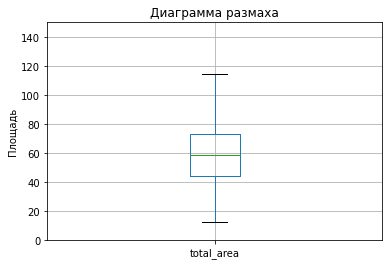

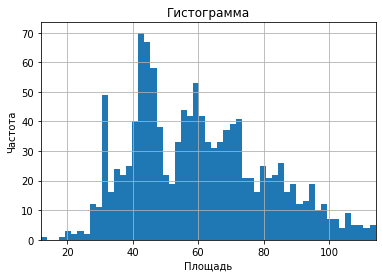

In [52]:
# Whisker plot
saintp_center.boxplot(column='total_area')
plt.title('Диаграмма размаха')
plt.ylabel('Площадь')
plt.ylim(0, 150)

# Plot hist
# data.hist('last_price',bins=100,range=(0,20))
saintp_center.hist('total_area',bins=55)
plt.xlim(det_whiskers('total_area')[0], det_whiskers('total_area')[1])
plt.title('Гистограмма')
plt.xlabel('Площадь')
plt.ylabel('Частота')

print(saintp_center['total_area'].describe())

**Price**

count    1212.000000
mean        7.018184
std         2.225418
min         2.400000
25%         5.257750
50%         6.800000
75%         8.639511
max        11.900000
Name: last_price, dtype: float64


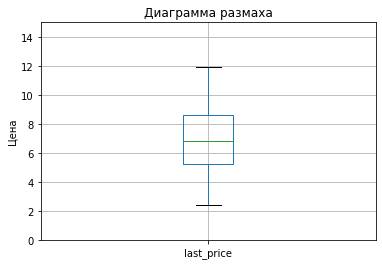

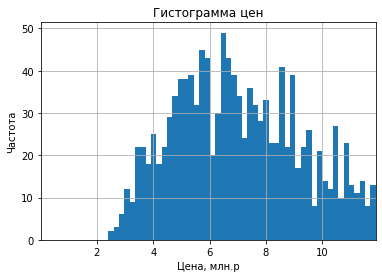

In [53]:
# строю диаграмму размаха
saintp_center.boxplot(column='last_price')
plt.title('Диаграмма размаха')
plt.ylabel('Цена')
plt.ylim(0, 15)

# строю гистограмму
# data.hist('last_price',bins=100,range=(0,20))
saintp_center.hist('last_price',bins=50)
plt.xlim(det_whiskers('last_price')[0], det_whiskers('last_price')[1])
plt.title('Гистограмма цен')
plt.xlabel('Цена, млн.р')
plt.ylabel('Частота')

print(saintp_center['last_price'].describe())

Room numbers

count    1212.000000
mean        2.090759
std         0.909631
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64


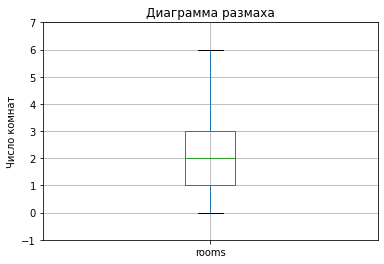

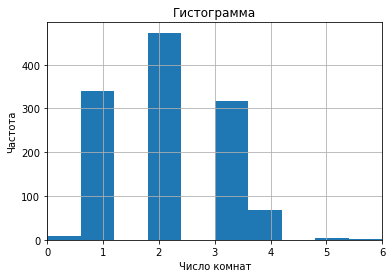

In [54]:
# Plot whisker
saintp_center.boxplot(column='rooms')
plt.title('Диаграмма размаха')
plt.ylabel('Число комнат')
plt.ylim(-1, 7)

# Plot hist
# data.hist('last_price',bins=100,range=(0,20))
saintp_center.hist('rooms',bins=10)
plt.xlim(det_whiskers('rooms')[0], det_whiskers('rooms')[1])
plt.title('Гистограмма')
plt.xlabel('Число комнат')
plt.ylabel('Частота')

print(saintp_center['rooms'].describe())

**Ceiling height**

count    1212.000000
mean        2.654686
std         0.077460
min         2.500000
25%         2.650000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64


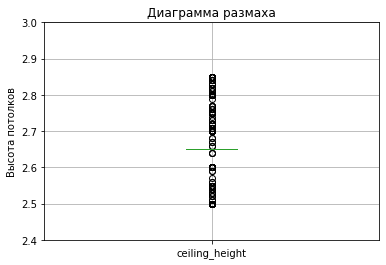

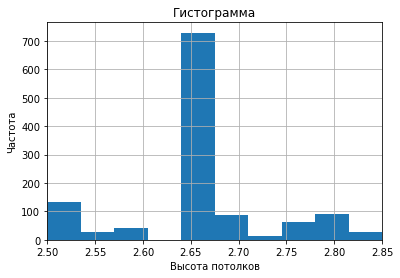

In [55]:
# Plot whisker
saintp_center.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха')
plt.ylabel('Высота потолков')
plt.ylim(2.4, 3)

# Plot hist
# data.hist('last_price',bins=100,range=(0,20))
saintp_center.hist('ceiling_height',bins=10)
plt.xlim(det_whiskers('ceiling_height')[0], det_whiskers('ceiling_height')[1])
plt.title('Гистограмма')
plt.xlabel('Высота потолков')
plt.ylabel('Частота')

print(saintp_center['ceiling_height'].describe())

**Also highlight the factors that affect the cost of an apartment:**
  - number of rooms
  - floor
  - distance from the center
  - date of placement of the ad.
  
Do they differ from the general conclusions throughout the database?

- The dependence of the cost of an apartment on the number of rooms in the center of St. Petersburg is strong: there is more demand for 5-room apartments which leads to a directly proportional dependence of the price on the number of rooms. 5-room apartments in the center of St. Petersburg as a rule will be sold more expensive than 4-room
    
-------------------------------------------------- ----------------------------------------------------------------------------
    
- in the city center there is dependence on the floor of the apartment: an apartment on the top floor will cost more on average than on the first floor.
-------------------------------------------------------------------------------------------------------------------------------
    
- The farther from the city center the cheaper the apartment will cost on average: on average the difference in cost between the first and eighth kilometers from the center reach 3 million rubles.
-------------------------------------------------------------------------------------------------------------------------------
    
- Strangely, apartments advertised for sale on Sundays sold on average at a higher price. The same is true for announcements published in early spring and early autumn (in March and September respectively) during the period 2015-2019. on average such apartments were sold more expensive.


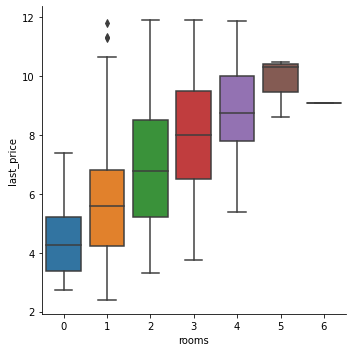

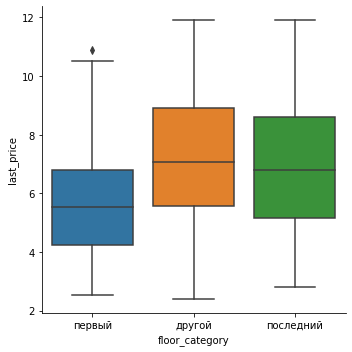

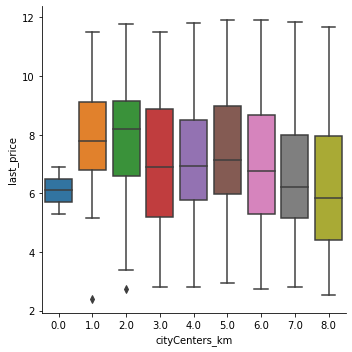

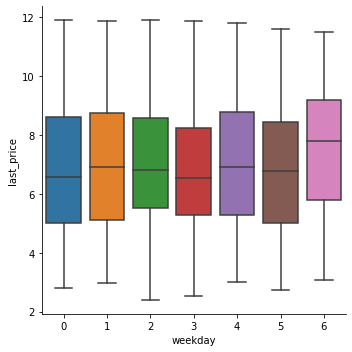

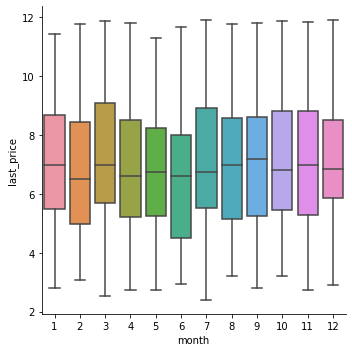

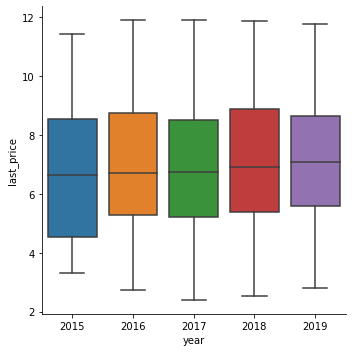

In [56]:
for i in ['rooms', 'floor_category', 'cityCenters_km', 'weekday', 'month', 'year']:
    sb.catplot(x=i, y="last_price", kind="box", data=saintp_center)

To determine the market value of real estate the following parameters are important:

- total area of the apartment;
- distance to city center;
- number of rooms and floor of the apartment;
- term of sale of the apartment.